In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#from sklearn.utils.validation import leverage_scores


In [4]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [5]:
ppp = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\ppp_dataframe.csv', 'rb'),
)

In [6]:
ppp.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,37919130.92
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,18503466.08
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,25776333.02
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4090793.64
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,59674735.79


# Simple Linear Regression

In [46]:
#Simple linear regression using Keith's suggested variables 
y = ppp['Number of Loans Received']
x = ppp[['March Employment Numbers', 'Self-Employment as % of Workforce']]

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=85)

In [48]:
#calculate our baseline model using mean of the target variable

from sklearn.metrics import r2_score

y_mean = np.mean(y1_train)

y_pred = np.full_like(y1_test, y_mean)

r2_baseline = r2_score(y1_test, y_pred)

r2_baseline

-0.004174649432518773

In [49]:
model_simple = LinearRegression().fit(X1_train, y1_train)

In [50]:
score = model_simple.score(X1_train, y1_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_simple.score(X1_test, y1_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.922
R-squared score of the model on the test set: 0.946


In [51]:
y1_pred = model_simple.predict(X1_test)
y1_test_array = y1_test.values.reshape(-1, 1)
y1_pred_array = y1_pred.reshape(-1, 1)
comparison = np.hstack((y1_pred_array, y1_test_array))
print(comparison[:10])

[[ 3727.17036151  3670.        ]
 [ 1415.59468485  1149.        ]
 [ 4769.73786559   535.        ]
 [11320.5032581  10827.        ]
 [ 1475.13581757  1260.        ]
 [ 4034.23496191  1947.        ]
 [ 1372.28492199   536.        ]
 [ 1283.61753482   506.        ]
 [ -405.8014171    321.        ]
 [  443.16861161   500.        ]]


In [52]:
y1_pred2 = model_simple.predict(x)

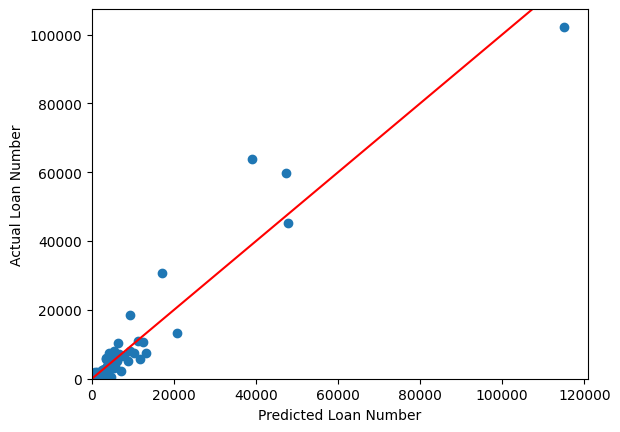

In [54]:
fig, ax = plt.subplots()
ax.scatter(y1_pred2, y)
ax.set_xlabel('Predicted Loan Number')
ax.set_ylabel('Actual Loan Number')
ax.set_xlim(0)
ax.set_ylim(0)
ax.axline((0, 0), slope=1, color = 'red')

it's weird that it's occasionally predicting negative values, but oh well...

In [13]:
f_values, p_values = f_regression(X1_train, y1_train)
for i, col_name in enumerate(X1_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

March Employment Numbers: p-value=0.0000
Self-Employment as % of Workforce: p-value=0.0084


This model is already amazing we love to see it 

In [14]:
#check the residuals etc. to make sure nothing funky is going on
#import statsmodels.api as sm

#Fit linear model to any dataset
model_simple2 = sm.OLS(y1_train,X1_train)
results = model_simple2.fit()

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external
cooks_d

(array([5.80136277e-05, 3.90871325e-06, 1.01303153e-05, 2.65803137e-05,
        1.17431492e-05, 6.55906828e-05, 3.09522373e-05, 7.64528082e-05,
        1.57910072e-04, 1.99321911e-04, 7.63964078e-05, 6.74829484e-05,
        2.30844037e-05, 3.34499398e-04, 9.20758537e-08, 2.45804045e+00,
        1.49512483e-03, 1.13027189e-05, 1.04107941e-04, 1.25941828e-04,
        5.99543946e-03, 2.74525310e-05, 5.41179487e-08, 1.18905871e-04,
        6.36021360e-05, 6.70037634e-05, 1.07250723e-05, 1.20657543e-03,
        4.12045522e-02, 2.30823092e-03, 1.04353310e-04, 1.71032202e-06,
        9.70699611e-05, 1.89331130e-04, 1.20035758e-05, 2.43731236e-04,
        3.72814133e-05, 9.83470618e-06, 7.29608298e-04, 2.04390064e-02,
        3.59506180e-05, 1.90809715e-04, 1.20197544e-05, 2.46809036e-05,
        6.35401800e-04, 1.66330514e-04, 1.30854955e-05, 1.35746055e-06,
        1.13324087e-05, 6.22752834e-06, 1.89320811e-06, 2.40981388e-04,
        1.45624186e-04, 3.65042657e-05, 3.24850215e-05, 5.884404

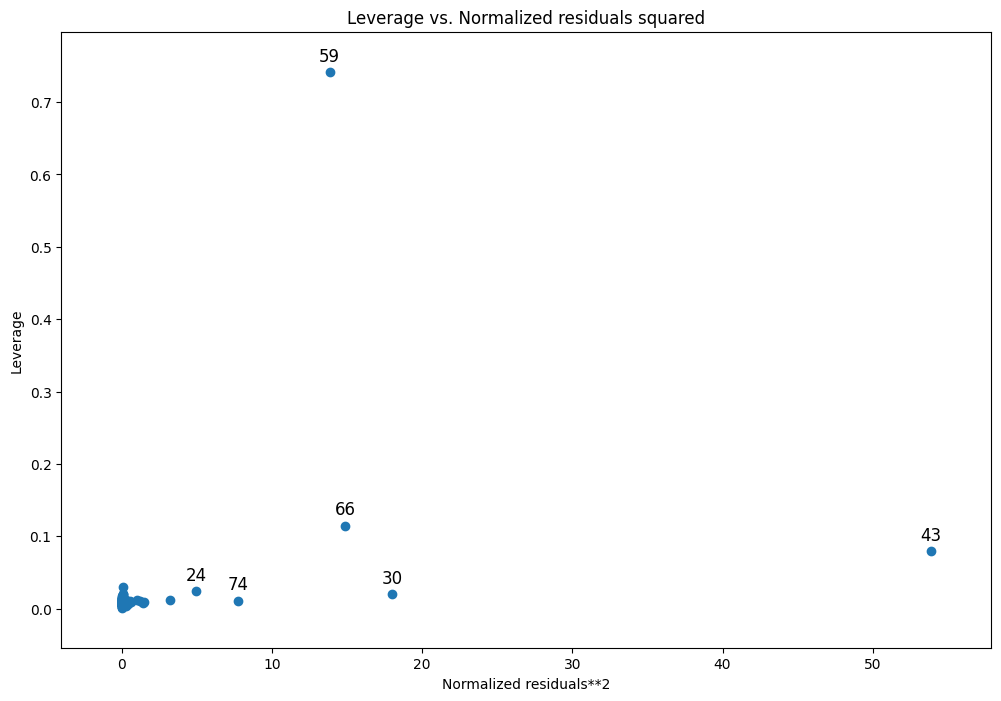

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)
plt.show()

We see at least one outlier; let's check that after we check the other residual stuff

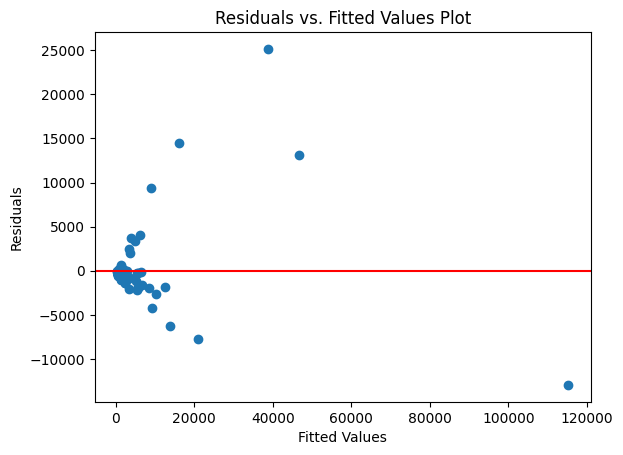

In [16]:
# Create a residuals vs. fitted values plot
y1_pred = results.predict(X1_train)
residuals = y1_train - y1_pred


fig, ax = plt.subplots()
ax.scatter(y1_pred, residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

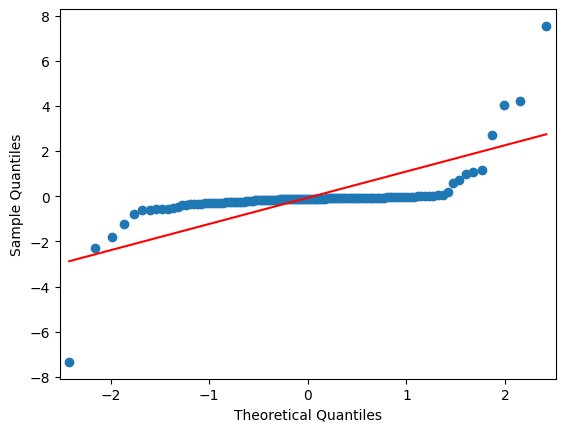

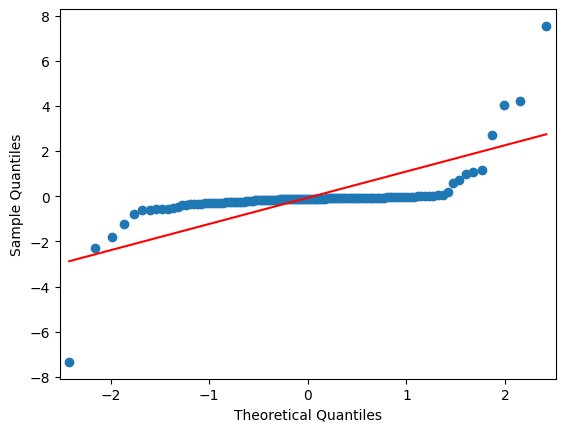

In [17]:
import statsmodels.graphics.gofplots as smg

# Create QQ plot of standardized residuals
smg.qqplot(standardized_residuals, line='s')

There is an issue with basic regression here; it is violating our linearity assumptions. We'll try a few transformations to see if we can fix it

In [18]:
# Find the index of the outlier
outlier_indices = np.where(cooks_d[0] > 4/len(X1_train))[0]

# Print the index and the Cook's distance value for each outlier
for i in outlier_indices:
    print("Index of the outlier:", i)
    print("Cook's distance value:", cooks_d[0][i])


Index of the outlier: 15
Cook's distance value: 2.458040448989391
Index of the outlier: 28
Cook's distance value: 0.04120455217199683
Index of the outlier: 66
Cook's distance value: 1.045809225059678
Index of the outlier: 70
Cook's distance value: 0.06429379837613425
Index of the outlier: 71
Cook's distance value: 77.22727281715063
Index of the outlier: 100
Cook's distance value: 0.18434741409378683


ok so we definitely want to remove #71 and maybe #15 and #66 - the rest are probably fine. Let's see what counties they are to figure out why their values might be so different

In [19]:
# Get the actual row of the outlier
outlier_row = X1_train.iloc[outlier_indices]

# Print the row of the outlier
print("Row of the outlier:", outlier_row)

Row of the outlier:     March Employment Numbers  Self-Employment as % of Workforce
43                    301003                           0.207468
74                     67334                           0.190328
66                    361567                           0.234506
24                    162070                           0.161400
59                    903424                           0.206814
30                    122691                           0.224638


In [20]:
ppp.loc[outlier_indices]

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received
15,13031,1579,38043.0,3.7,0.713841,706,76120,2.00,0.133689,0.758817,0.137252,0.005420,0.048702,0.083130,0.213130,0.096565,0.008206,0.019771,0.058702,0.133397,0.140687,0.020000,0.006031,0.002252,0.005420,0.0,0.000000,0.048702,0.083130,0.000000,0.008206,0.019008,0.000000,0.029313,0.035153,0.127405,0.006679,0.134008,0.020000,0.006031,0.002252,0.499777,26148,3252,22896,0.124369,2810,1.159760e+08
28,13059,3283,60945.0,3.4,1.176222,923,126176,1.94,0.152996,0.735126,0.104240,0.001142,0.025715,0.077397,0.219430,0.086089,0.006074,0.022832,0.072883,0.093834,0.066545,0.023333,0.007815,0.001379,0.000000,0.0,0.002243,0.025715,0.077397,0.032123,0.006074,0.015978,0.022999,0.044521,0.019990,0.074207,0.005112,0.122851,0.023333,0.007815,0.001379,0.483016,69223,8841,60382,0.127718,5013,2.819616e+08
66,13135,26753,498291.0,3.0,0.748073,1095,915046,2.05,0.234506,0.808664,0.140450,0.001296,0.061371,0.077784,0.210170,0.124717,0.011334,0.055076,0.090467,0.058955,0.105084,0.026061,0.006975,0.003584,0.000000,0.0,0.001746,0.061371,0.077784,0.085751,0.011334,0.017994,0.038080,0.080267,0.039257,0.091530,0.011366,0.093720,0.026061,0.006975,0.003584,0.544553,361567,48039,313528,0.132863,59693,2.700585e+09
70,13143,516,12804.0,3.5,0.566802,794,29227,1.67,0.173200,0.808003,0.340416,0.002125,0.068140,0.270152,0.162629,0.081456,0.003542,0.024083,0.035557,0.104547,0.094773,0.021108,0.022524,0.002125,0.002125,0.0,0.000000,0.068140,0.270152,0.038249,0.003542,0.001983,0.026349,0.000000,0.115739,0.000000,0.003967,0.090948,0.021108,0.022524,0.002125,0.438088,7000,1097,5903,0.156714,536,3.359983e+07
71,13145,486,17301.0,3.0,0.314488,668,34105,1.82,0.154073,0.841113,0.300577,0.018010,0.070817,0.211750,0.164889,0.078161,0.003497,0.019059,0.045637,0.054730,0.157195,0.008568,0.003672,0.004197,0.018010,0.0,0.000000,0.070817,0.211750,0.000000,0.003497,0.006120,0.000000,0.026054,0.116279,0.003322,0.000000,0.000000,0.008568,0.003672,0.004197,0.507286,5279,669,4610,0.126729,908,3.380375e+07
100,13205,437,8791.0,4.5,0.810550,664,22244,1.82,0.167804,0.766738,0.412123,0.063950,0.030162,0.318010,0.144722,0.088892,0.000000,0.018416,0.029872,0.056119,0.043358,0.010441,0.035093,0.000000,0.063950,0.0,0.000000,0.030162,0.318010,0.000000,0.000000,0.018126,0.017401,0.012616,0.082077,0.006090,0.000000,0.000000,0.010441,0.035093,0.000000,0.395208,6807,496,6311,0.072866,1610,4.633076e+07


Our most concerning counties are:  
13031 - Bulloch County  
13135 - Gwinnett County   
13145 - Harris County (this is by far the biggest outlier)


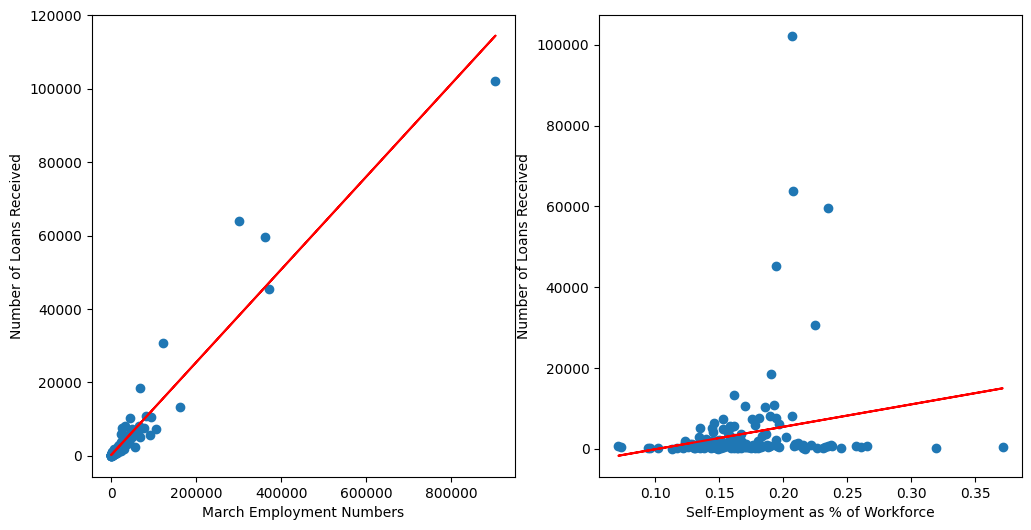

In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt

#check scatterplots of included variables to see what the issue might be 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot the first scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x.iloc[:, 0], y)
line = slope * x.iloc[:, 0] + intercept
ax1.scatter(x.iloc[:, 0], y)
ax1.plot(x.iloc[:, 0], line, color='red')
ax1.set_xlabel('March Employment Numbers')
ax1.set_ylabel('Number of Loans Received')

# Plot the second scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x.iloc[:, 1], y)
line = slope * x.iloc[:, 1] + intercept
ax2.scatter(x.iloc[:, 1], y)
ax2.plot(x.iloc[:, 1], line, color='red')
ax2.set_xlabel('Self-Employment as % of Workforce')
ax2.set_ylabel('Number of Loans Received')

# Show the plots
plt.show()

employment #s looks very linear, self-employment is obviously the issue here with a weird trend

In [58]:
# Apply Box-Cox transformation to 'Self-Employment' to see if it helps
y = ppp['Number of Loans Received']
x = ppp[['March Employment Numbers', 'Self-Employment as % of Workforce']]

x['Self-Employment as % of Workforce'], _ = stats.boxcox(x['Self-Employment as % of Workforce'] + 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=85)

# Define the list of indices to drop
indices_to_drop = [71, 66, 15]

# Drop the specified indices from X1_train and y1_train
X2_train = X2_train.drop(X2_train.index[indices_to_drop])
y2_train = y2_train.drop(y2_train.index[indices_to_drop])

In [59]:
model_simple2 = LinearRegression().fit(X2_train, y2_train)

print('Coefficients:', model_simple2.coef_)
print('Intercept:', model_simple2.intercept_)

y2_pred = model_simple2.predict(X2_test)

print('R^2 score:', model_simple2.score(X2_test, y2_test))

Coefficients: [1.26126077e-01 3.58808230e+04]
Intercept: -3331.1861046152503
R^2 score: 0.961651429907188


In [60]:
y_pred = model_simple2.predict(x)

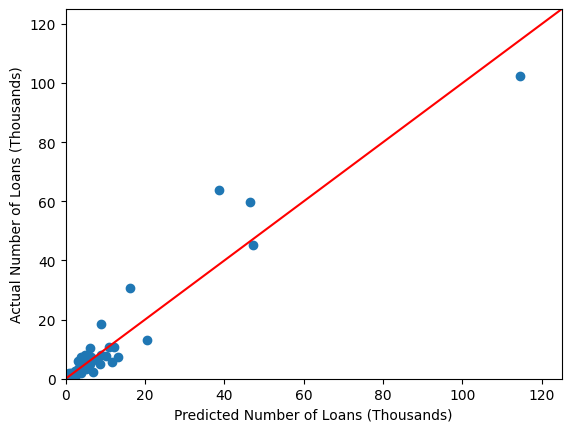

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_pred/1000, y/1000)
ax.set_xlabel('Predicted Number of Loans (Thousands)')
ax.set_ylabel('Actual Number of Loans (Thousands)')
ax.set_xlim(0, 125)
ax.set_ylim(0, 125)
ax.axline((0, 0), slope=1, color = 'red')

In [64]:
ppp['predicted'] = model_simple2.predict(x)

In [65]:
ppp.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,predicted
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,37919130.92,578.477768
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,18503466.08,-71.364580
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,25776333.02,180.364084
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4090793.64,224.596119
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,59674735.79,2328.699738


In [67]:
ppp[ppp['CountyID'] == 13135]





#13121


,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,predicted
66,13135,26753,498291.0,3.0,0.748073,1095,915046,2.05,0.234506,0.808664,0.14045,0.001296,0.061371,0.077784,0.21017,0.124717,0.011334,0.055076,0.090467,0.058955,0.105084,0.026061,0.006975,0.003584,0.0,0.0,0.001746,0.061371,0.077784,0.085751,0.011334,0.017994,0.03808,0.080267,0.039257,0.09153,0.011366,0.09372,0.026061,0.006975,0.003584,0.544553,361567,48039,313528,0.132863,59693,2.700585e+09,46436.550898


In [68]:
ppp[ppp['CountyID'] == 13067]

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,predicted
32,13067,23220,430881.0,3.0,0.888359,1264,751218,1.81,0.194082,0.77721,0.124675,0.000313,0.07535,0.049009,0.214621,0.105067,0.029651,0.029956,0.075211,0.05755,0.052847,0.024527,0.00893,0.002471,0.000118,0.000195,0.002603,0.07535,0.049009,0.061197,0.029651,0.01822,0.046641,0.047211,0.011428,0.101641,0.006186,0.046662,0.024527,0.00893,0.002471,0.573577,371398,47519,323879,0.127946,45353,2.408211e+09,47327.970855


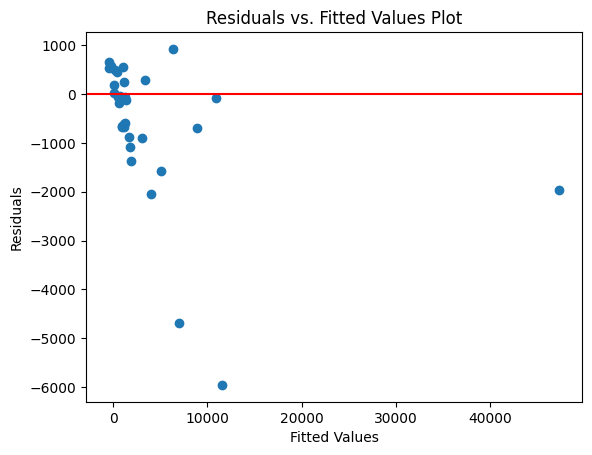

In [24]:
# Create a residuals vs. fitted values plot
residuals2 = y2_test - y2_pred

fig, ax = plt.subplots()
ax.scatter(y2_pred, residuals2)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

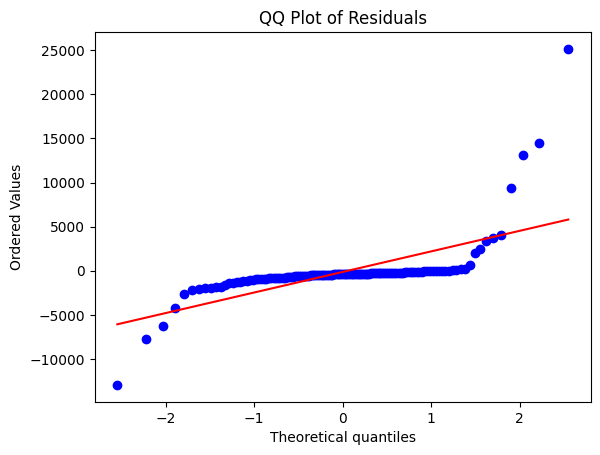

In [25]:
fig, ax = plt.subplots()
stats.probplot(residuals, plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

Ok they still look weird...this didn't really work but it's only a few points so I guess we can move on with our lives

In [28]:
#let's try the same thing but add a large county size variable
ppp2 = ppp.copy()
ppp2['Large County Indicator'] = ppp2['Total Pop'].apply(lambda x: 0 if x < 500000 else 1)
ppp2.head(5)


,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,Large County Indicator
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,37919130.92,0
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,18503466.08,0
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,25776333.02,0
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4090793.64,0
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,59674735.79,0


In [29]:
y = ppp2['Number of Loans Received']
x = ppp2[['March Employment Numbers', 'Self-Employment as % of Workforce', 'Large County Indicator']]

X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=85)

model_simple3 = LinearRegression().fit(X1_train, y1_train)

score = model_simple3.score(X1_train, y1_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_simple3.score(X1_test, y1_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.961
R-squared score of the model on the test set: 0.832


In [30]:
#try without splitting into train and test even though I don't think we should pursue this option

y = ppp2['Number of Loans Received']
x = ppp2[['March Employment Numbers', 'Self-Employment as % of Workforce', 'Large County Indicator']]

model_simple3 = LinearRegression().fit(x, y)

score = model_simple3.score(x, y)
print(f'R-squared score of the model on the full dataset: {score:.3f}')

R-squared score of the model on the full dataset: 0.952


# Lasso Regression

In [31]:
from sklearn.linear_model import LassoCV

In [32]:
ppp.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,37919130.92
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,18503466.08
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,25776333.02
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4090793.64
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,59674735.79


In [68]:
lasso_df = ppp.drop(columns = ['Total Establishments', 'Labor_Force', 'Total Pop', 'Non-Employer Establishments as % of All Establishments', 'Jobs_Lost', 'April_Jobs', 'Job_Loss_Ratio'])

In [69]:
y3 = lasso_df['Number of Loans Received']
X3 = lasso_df.iloc[:, 1:-2]

In [70]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=38)

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X3_train, y3_train)

score = lasso_cv.score(X3_train, y3_train)
print(f'R-squared score of the model: {score:.3f}')

test_score = lasso_cv.score(X3_test, y3_test)
print(f'R-squared score of the test:{score:.3f}')

R-squared score of the model: 0.889
R-squared score of the test:0.889


In [71]:
coef_df = pd.DataFrame({'feature': X3.columns, 'coefficient': lasso_cv.coef_})

# filter for selected variables and print
selected_vars = coef_df[coef_df['coefficient'] != 0]
print(selected_vars)

                     feature  coefficient
37  March Employment Numbers     0.146864


# Stats and Graphs for NEE

In [33]:
full_ppp = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\Data\GeorgiaSBAPPPDataAll_060921.csv', 'rb'),
)

In [34]:
full_ppp.head(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,FIPSCountyCode,CountyID,ProjectState,ProjectZip,ProjectZip2,ProjectZip3,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,5.407399e+09,2/27/2021,405.0,PPP,GREATER COLUMBUS GEORGIA CHAMBER OF COMMERCE,1200 6th Ave,Columbus,GA,31901-2613,NaN,Exemption 4,60.0,100.0,149999.99,149999.99,0.0,NaN,19248.0,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,N,Existing or more than 2 years old,Columbus,MUSCOGEE,13215.0,3215.0,GA,31901-2613,31901.0,2613,GA-02,12.0,813910.0,Unanswered,Unknown/NotStated,NaN,149999.99,NaN,NaN,NaN,NaN,NaN,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
1,1.115609e+09,3/12/2021,405.0,PPP,IN LOVING HANDS COMMUNITY DEVELOPMENT CORP,8064 Malone St,Douglasville,GA,30134-1237,NaN,Exemption 4,60.0,100.0,149999.00,149999.00,0.0,NaN,499141.0,"Readycap Lending, LLC",200 Connell Drive Suite 4000,BERKELEY HEIGHTS,NJ,7922,U,Y,Y,Existing or more than 2 years old,Douglasville,DOUGLAS,13097.0,3097.0,GA,30134-1237,30134.0,1237,GA-13,8.0,925120.0,Unanswered,Unknown/NotStated,NaN,149998.00,NaN,NaN,NaN,NaN,NaN,Corporation,499141.0,"Readycap Lending, LLC",BERKELEY HEIGHTS,NJ,Female Owned,Non-Veteran,NaN
2,6.235549e+09,4/3/2021,405.0,PPS,CABLE TECHNOLOGY COMMUNICATION LLC,331 Rockbridge Rd NW Ste 1200,Lilburn,GA,30047-6108,NaN,Exemption 4,60.0,100.0,149999.00,149999.00,0.0,NaN,509316.0,"Harvest Small Business Finance, LLC",24422 Avenida de la Carlota Suite 232,Laguna Hills,CA,92653,U,N,N,Existing or more than 2 years old,Lilburn,GWINNETT,13135.0,3135.0,GA,30047-6108,30047.0,6108,GA-04,64.0,238210.0,Unanswered,Not Hispanic or Latino,1.0,149993.00,NaN,NaN,NaN,NaN,NaN,Corporation,509316.0,"Harvest Small Business Finance, LLC",Laguna Hills,CA,Male Owned,Non-Veteran,NaN
3,6.745719e+09,5/2/2021,405.0,PPS,IN LOVING HANDS COMMUNITY DEVELOPMENT CORP,8064 Malone St,Douglasville,GA,30134-1237,NaN,Exemption 4,60.0,100.0,149999.00,149999.00,0.0,NaN,499141.0,"Readycap Lending, LLC",200 Connell Drive Suite 4000,BERKELEY HEIGHTS,NJ,7922,U,N,Y,Existing or more than 2 years old,Douglasville,DOUGLAS,13097.0,3097.0,GA,30134-1237,30134.0,1237,GA-13,8.0,925120.0,Unanswered,Unknown/NotStated,1.0,149997.00,NaN,NaN,NaN,NaN,NaN,Corporation,499141.0,"Readycap Lending, LLC",BERKELEY HEIGHTS,NJ,Female Owned,Non-Veteran,NaN
4,6.981499e+09,5/23/2021,405.0,PPS,WATSON INSURANCE GROUP LLC,3225 Shallowford Rd Ste 930,Marietta,GA,30062-7029,5/23/2021,Active Un-Disbursed,60.0,100.0,149999.00,149999.00,149999.0,NaN,514546.0,"BSD Capital, LLC dba Lendistry",330 E. Lambert Rd Suite 275,Brea,CA,92821,U,N,N,Existing or more than 2 years old,Marietta,COBB,13067.0,3067.0,GA,30062-7029,30062.0,7029,GA-06,10.0,524210.0,White,Not Hispanic or Latino,NaN,149999.00,NaN,NaN,NaN,NaN,NaN,Corporation,514546.0,"BSD Capital, LLC dba Lendistry",Brea,CA,Female Owned,Non-Veteran,NaN


In [35]:
num_rows = len(full_ppp[full_ppp['JobsReported'] <= 1])
total = len(full_ppp)
print(num_rows)
print(total)

418447
1048575


In [36]:
stat = num_rows / total
stat

0.3990625372529385

In [40]:
full_ppp['DateApproved'] = pd.to_datetime(full_ppp['DateApproved'])

In [43]:
min_date = full_ppp['DateApproved'].min()
max_date = full_ppp['DateApproved'].max()
print(min_date)
print(max_date)

2020-04-03 00:00:00
2021-05-29 00:00:00


In [44]:
second_draw_NEES = len(full_ppp[(full_ppp['JobsReported'] <= 1) & (full_ppp['DateApproved'] >= '2021-01-01')])

percentage_second_draw_NEES = (second_draw_NEES / num_rows) * 100
percentage_second_draw_NEES

86.12536354663793

In [82]:
graph = ppp.copy()

In [88]:
graph = graph.sort_values('Non-Employer Establishments as % of All Establishments', ascending=False)
top_10 = graph.nlargest(10, "Non-Employer Establishments as % of All Establishments")["Non-Employer Establishments as % of All Establishments"].tolist()
top_10

[0.9059633027522936,
 0.8885714285714286,
 0.878140421713773,
 0.8596609753101585,
 0.8581377995191112,
 0.8566216709230208,
 0.8516183270281631,
 0.8504335260115607,
 0.8502747252747253,
 0.8469635627530364]

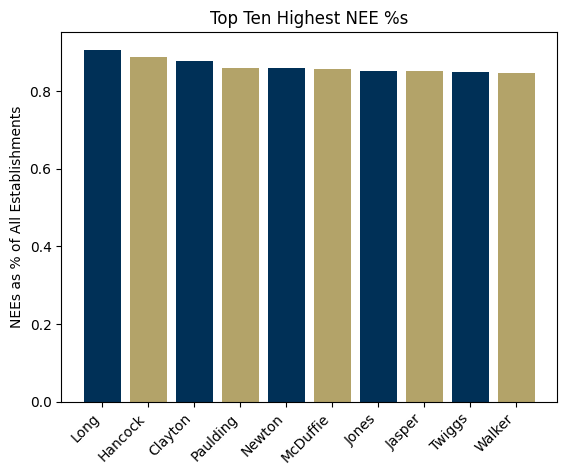

In [96]:
import matplotlib.pyplot as plt

graph = graph.sort_values('Non-Employer Establishments as % of All Establishments', ascending=False)

top_10 = graph.nlargest(10, "Non-Employer Establishments as % of All Establishments")[["CountyID", "Non-Employer Establishments as % of All Establishments"]]

county_list = ['Long', 'Hancock', 'Clayton', 'Paulding', 'Newton', 'McDuffie', 'Jones', 'Jasper', 'Twiggs', 'Walker']

colors = ['#003057', '#B3A369']
fig, ax = plt.subplots()
for i in range(len(top_10)):
    ax.bar(i, top_10.iloc[i][1], color=colors[i%2])
plt.ylabel("NEEs as % of All Establishments")
plt.xticks(range(len(top_10)), county_list, rotation=45, ha='right')
plt.title("Top Ten Highest NEE %s")
plt.show()

#county_list = ['Long', 'Hancock', 'Clayton', 'Paulding', 'Newton', 'McDuffie', 'Jones', 'Jasper', 'Twiggs', 'Walker']


In [122]:
grouped = full_ppp.groupby('FIPSCountyCode')
counts = grouped['JobsReported'].agg(['count', lambda x: (x <= 1).sum()])
counts['division'] = counts['<lambda_0>'] / counts['count']
counts = counts.reset_index()
counts.columns = ['FIPSCountyCode', 'Total Loans', 'NEE Loans', '% Loans for NEEs']

counts.head(5)

,FIPSCountyCode,Total Loans,NEE Loans,% Loans for NEEs
0,13001.0,776,503,0.648196
1,13003.0,387,310,0.801034
2,13005.0,589,383,0.650255
3,13007.0,189,141,0.746032
4,13009.0,1821,1317,0.723229


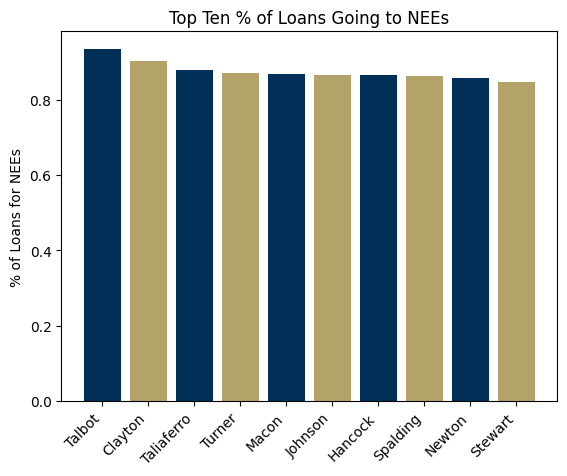

In [129]:
# counts = counts.sort_values('% Loans for NEEs', ascending=False)

# top_10 = counts.nlargest(10, "% Loans for NEEs")[["FIPSCountyCode", "% Loans for NEEs"]]

# top_10

# top_10 = top_10.set_index('FIPSCountyCode')
# colors = ['#003057', '#B3A369']
# fig, ax = plt.subplots()
# for i in range(len(top_10)):
#     ax.bar(i, top_10.iloc[i][1], color=colors[i%2])
# plt.ylabel("% of Loans for NEEs")
# plt.xticks(range(len(top_10)), counts['FIPSCountyCode'], rotation=45, ha='right')
# plt.title("Top Ten % of Loans Going to NEEs")
# plt.show()


# colors = ['#003057', '#B3A369']
# fig, ax = plt.subplots()
# for i in range(len(top_10)):
#     ax.bar(i, top_10.iloc[i][1], color=colors[i%2])
# plt.ylabel("% of PPP Loans Going to NEEs")
# plt.xticks(range(len(top_10)), counts['FIPSCountyCode'], rotation=45, ha='right')
# plt.title("Top Ten % of Loans Going to NEEs")
# plt.show()


counts = counts.sort_values('% Loans for NEEs', ascending=False)

top_10 = counts.nlargest(10, "% Loans for NEEs")[["FIPSCountyCode", "% Loans for NEEs"]]

county_list = ['Talbot', 'Clayton', 'Taliaferro', 'Turner', 'Macon', 'Johnson', 'Hancock', 'Spalding', 'Newton', 'Stewart']

top_10 = top_10.set_index('FIPSCountyCode')
colors = ['#003057', '#B3A369']
fig, ax = plt.subplots()
for i in range(len(top_10)):
    ax.bar(i, top_10.iloc[i][0], color=colors[i%2])
plt.ylabel("% of Loans for NEEs")
plt.xticks(range(len(top_10)), county_list, rotation=45, ha='right')
plt.title("Top Ten % of Loans Going to NEEs")
plt.show()
